In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

In [6]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=1)

In [17]:
import numpy as np
arr = np.random.randint(-128, 127, size=44100, dtype  = 'int8')
arr

array([-90, -44,  21, ..., -58, 115, -37], dtype=int8)

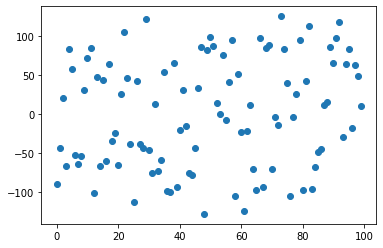

In [18]:
plot_sequence(arr)

In [20]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [23]:
arr = np.random.randint(-128, 127, size = 44100, dtype = 'int8')
sound = pygame.sndarray.make_sound(arr)
sound.play()